# Figure 2: Map colored by conditional probabilities

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/bradlipovsky/notebooks/SLIQ2/loadquakes.py'>

### 2. Load datasets

In [39]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv') # testing with eta0 = 10**3
PE = 0.00023661924119241191 # Probability of an earthquake in an individual 1deg/1deg bin

### 3. Plot the SLIQs from the full catalog with highest conditional probability

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

/home/bradlipovsky/notebooks/SLIQ2/loadquakes.py:276: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'SLIQs with highest conditional probability (full catalog)'}, xlabel='Longitude', ylabel='Latitude'>

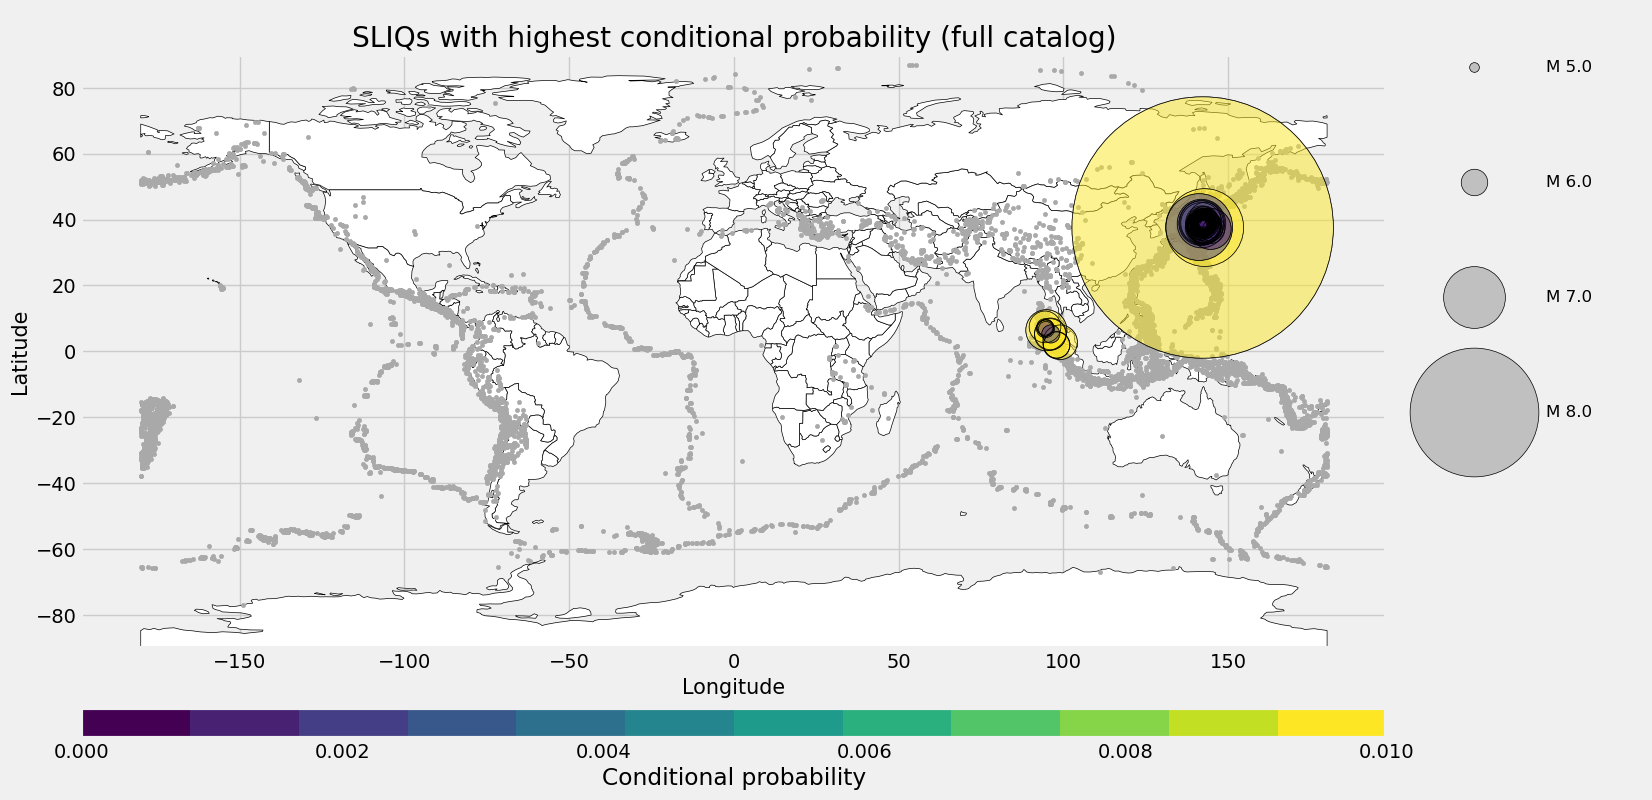

In [4]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.probability_map_cb(catalog,sliq_full.head(100),sliq_full.cp.head(100),
                              'SLIQs with highest conditional probability (full catalog)',
                              0,0.01,11,circle_scale=1e-6)

### 4. Plot the SLIQs from the ETAS catalog with highest conditional probability

In [5]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

/home/bradlipovsky/notebooks/SLIQ2/loadquakes.py:276: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Earthquakes with greatest likelihood of being induced by surface loading'}, xlabel='Longitude', ylabel='Latitude'>

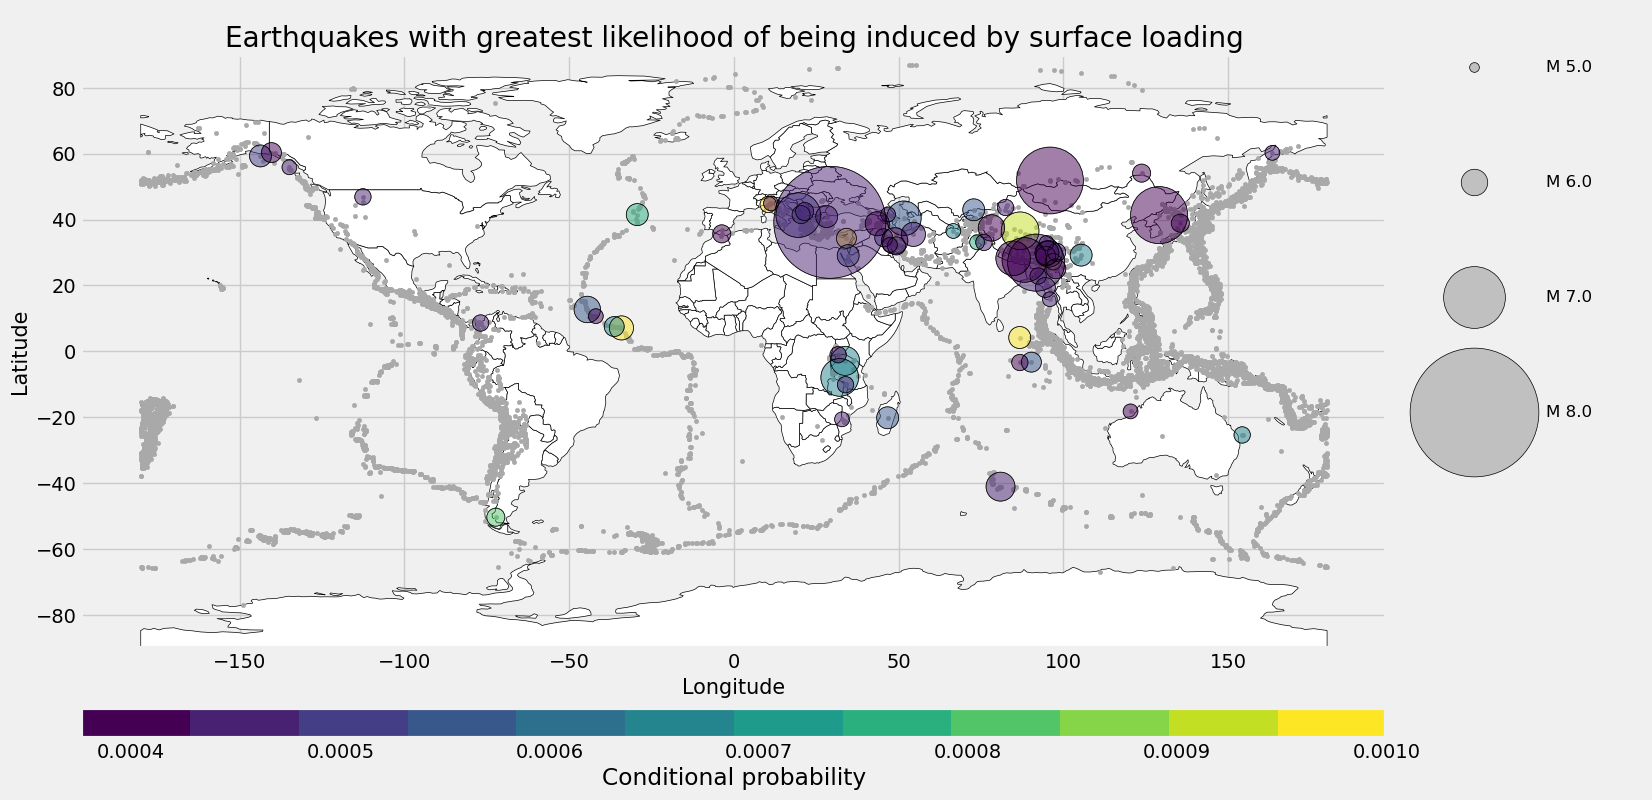

In [17]:
importlib.reload(loadquakes)

cp_threshold=1.59*PE

loadquakes.probability_map_cb(catalog,sliq_etas[sliq_etas.cp>cp_threshold],
                              sliq_etas.cp[sliq_etas.cp>cp_threshold],
                              'Earthquakes with greatest likelihood of being induced by surface loading',
                              cp_threshold,1e-3,11,circle_scale=1e-6)

In [7]:
sliq_etas[sliq_etas.cp>cp_threshold]

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp


### 5. Plot the SLIQs from the NND catalog with highest conditional probability

In [8]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

/home/bradlipovsky/notebooks/SLIQ2/loadquakes.py:276: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Earthquakes with greatest likelihood of being induced by surface loading (NND)'}, xlabel='Longitude', ylabel='Latitude'>

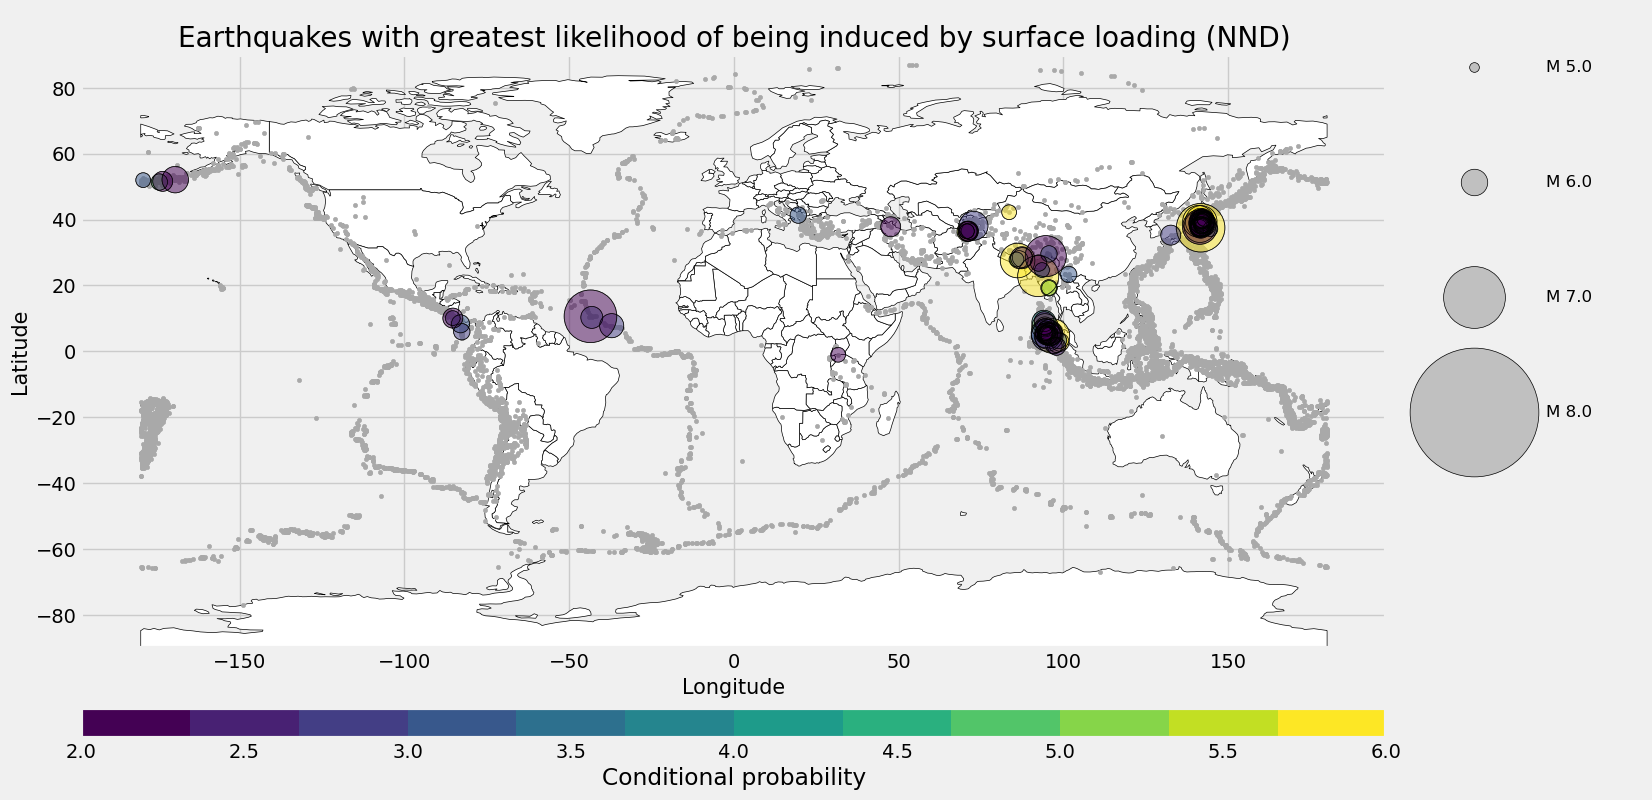

In [9]:
importlib.reload(loadquakes)

loadquakes.probability_map_cb(catalog,sliq_nnd.head(100),sliq_nnd.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading (NND)',
                              2,6,11,circle_scale=1e-6)

In [32]:
sliq_nnd_v2

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
1,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
2,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
3,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
4,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
5707,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
5708,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222
5709,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,0.001178,1.0,10.0,4.971506,0.000222


In [41]:
'''
This version of the map uses the events from NND declustering with eta0 = 10**3
'''
sliq_nnd_v2=NND_declustered_v2.sort_values('cp',ascending=False)
sliq_nnd_v2=sliq_nnd_v2.reset_index()
sliq_nnd_v2=sliq_nnd_v2.drop(['index'], axis=1)
sliq_nnd_v2['dmass']=sliq_nnd_v2['dmass'].astype(float)

/home/bradlipovsky/notebooks/SLIQ2/loadquakes.py:276: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Earthquakes with greatest likelihood of being induced by surface loading (NND)'}, xlabel='Longitude', ylabel='Latitude'>

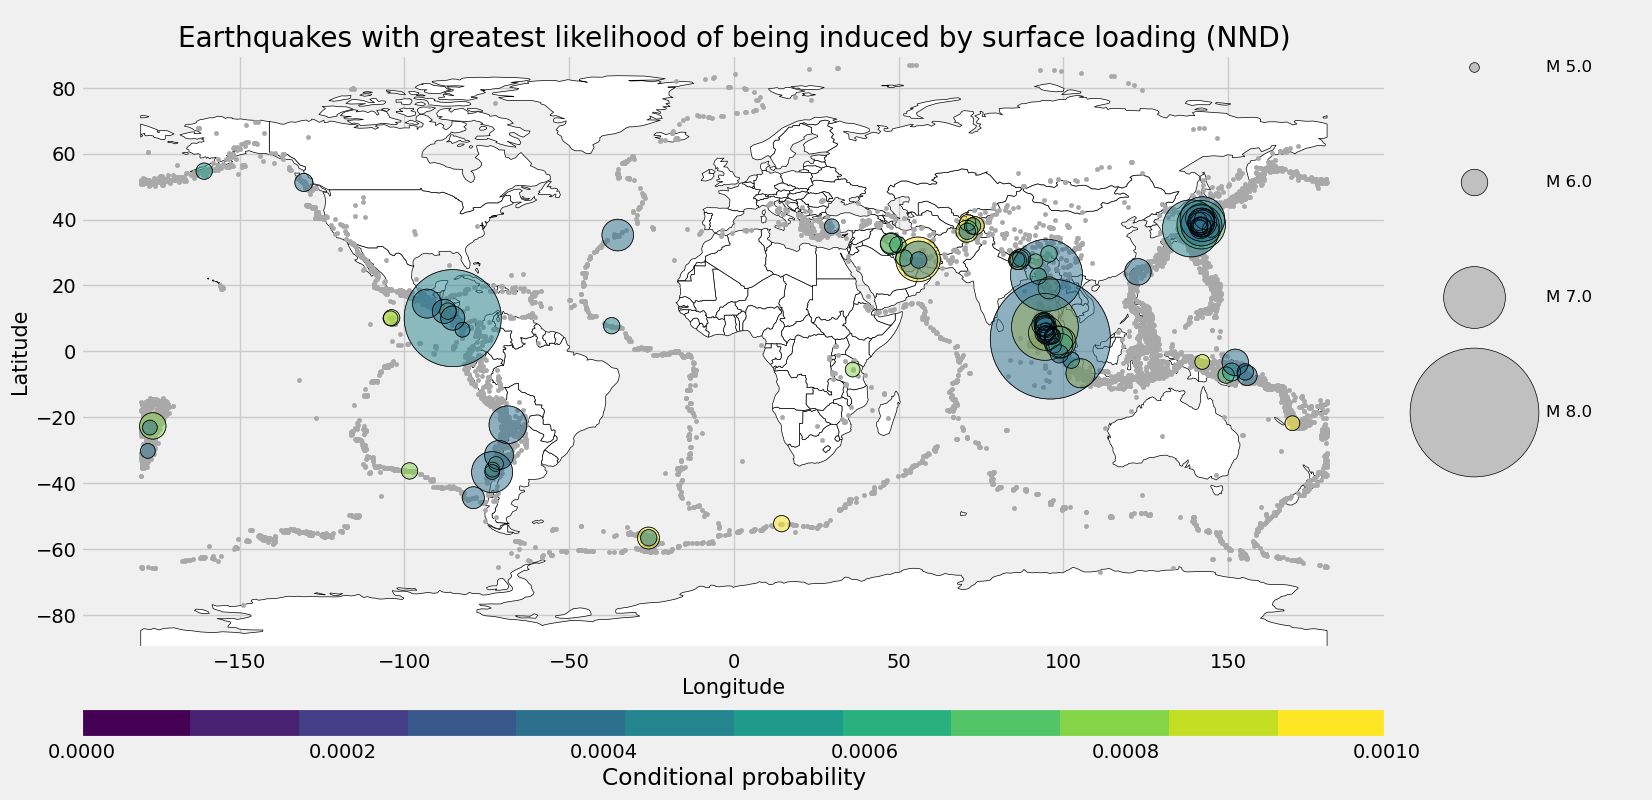

In [44]:
loadquakes.probability_map_cb(catalog,sliq_nnd_v2.head(100),sliq_nnd_v2.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading (NND)',
                              0.0,0.001,11,circle_scale=1e-6)